### 1. Problem statement
 - Detecting fraud transactions is of great importance for any credit card company. 
 - We are tasked by a well-known company to detect potential frauds so that customers are not charged for items that they did not purchase.  

 - So the goal is to build a classifier that tells if a transaction is a fraud or not.

### 2. Import library

numpy==1.16.4 for tensorflow 1.14.0

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
from collections import Counter
np.random.seed(2)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


### 3. Data processing

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


##### run below to understand the error

In [4]:
# scaler = StandardScaler()
# data['NormalizedAmount'] = scaler.fit_transform(data['Amount'])

#### 3.1 Scale data

In [5]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

#### 3.2 Split data

In [6]:
data = data.drop(['Amount', 'Time'], axis = 1)
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3.3 Convert data

In [9]:
train_identity = X_train.index
test_identity = X_test.index

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 4. Deep neural network

#### 4.1 Create model

In [11]:
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


#### 4.2 Fit model

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
199364/199364 [==============================] - 43s 217us/step - loss: 0.0096 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 42s 209us/step - loss: 0.0044 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 48s 241us/step - loss: 0.0038 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 50s 250us/step - loss: 0.0034 - acc: 0.99940s - loss: 0.0034 - a
Epoch 5/5
199364/199364 [==============================] - 42s 211us/step - loss: 0.0034 - acc: 0.9994


#### 4.3 Evaluate model

In [14]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 6s 65us/step
[0.004387747908288606, 0.9993914071369217]


In [15]:
y_pred = model.predict(X_test)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [17]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85278    18]
 [   34   113]]


Confusion matrix, without normalization


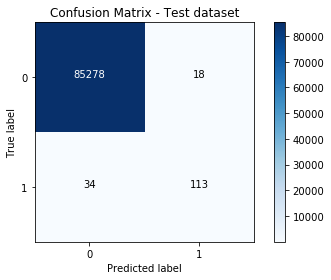

In [18]:
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

In [19]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9993914071369217
0.8625954198473282
0.7687074829931972
0.8129496402877697


#### 4.4 Undersampling & model test
#### Note - sampling is performed before data spliting which should be the case if future data is unbalanced, otherwise, sampling needs to be performed only on train set. 

#### 4.4.1 Undersampling

In [21]:
fraud_ind = np.array(data[data.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(data[data.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)

492
284315


In [22]:
normal_ind = data[data.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [23]:
under_sample_ind = np.concatenate( [fraud_ind, random_normal_ind])

In [24]:
print(len(under_sample_ind))

984


In [25]:
under_sample_data = data.iloc[under_sample_ind, :]

In [26]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 4.4.2 Model test

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
688/688 [==============================] - 1s 2ms/step - loss: 0.5323 - acc: 0.9099
Epoch 2/5
688/688 [==============================] - 0s 223us/step - loss: 0.2461 - acc: 0.9302
Epoch 3/5
688/688 [==============================] - 0s 231us/step - loss: 0.1652 - acc: 0.9360
Epoch 4/5
688/688 [==============================] - 0s 197us/step - loss: 0.1739 - acc: 0.9404
Epoch 5/5
688/688 [==============================] - 0s 241us/step - loss: 0.1542 - acc: 0.9433


In [31]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


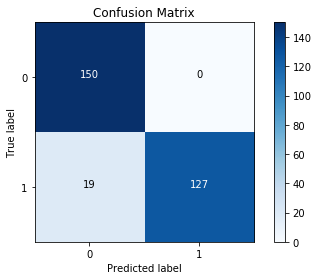

In [32]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [33]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9358108108108109
1.0
0.8698630136986302
0.9304029304029303


#### 4.5 SMOTE & Model test

#### 4.5.1 SMOTE
Note - sampling is performed before data spliting which should be the case if future data is unbalanced

In [34]:
X_resample, y_resample = SMOTE().fit_sample(X, y)

In [35]:
X_resample.shape

(568630, 29)

In [36]:
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [38]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 4.5.2 Model test

In [39]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 92s 232us/step - loss: 0.0343 - acc: 0.9879
Epoch 2/5
398041/398041 [==============================] - 91s 229us/step - loss: 0.0147 - acc: 0.9962
Epoch 3/5
398041/398041 [==============================] - 81s 204us/step - loss: 0.0116 - acc: 0.9970
Epoch 4/5
398041/398041 [==============================] - 67s 169us/step - loss: 0.0099 - acc: 0.9976
Epoch 5/5
398041/398041 [==============================] - 50s 125us/step - loss: 0.0093 - acc: 0.9978


In [40]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


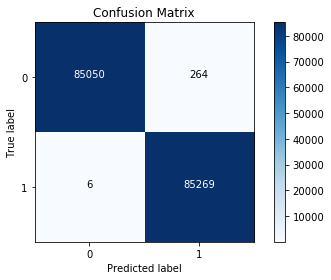

In [41]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [42]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9984172484744034
0.9969134719932657
0.9999296394019349
0.9984192777855837
